# Clustering: K-Means In-Depth

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# create data points with 3 cluters

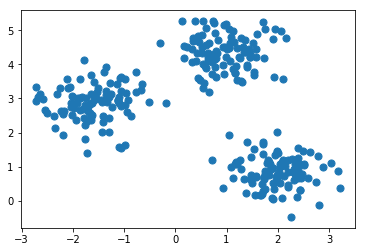

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3,n_features=2,
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], s=50);

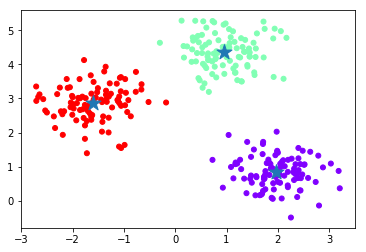

In [4]:
from sklearn.cluster import KMeans
km = KMeans(3)  # 3 clusters
km.fit(X)
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*')

# How to determine the best K?

## 1. Find the minimal SSE clustering using different K

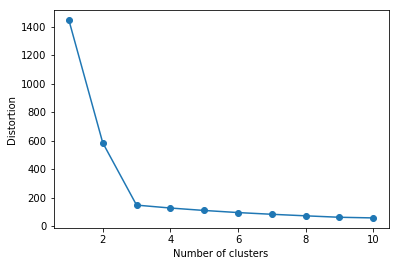

In [5]:
distortion = []
for i in range(10,0,-1):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortion.append(km.inertia_)
plt.plot(range(10,0,-1),distortion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## 2. Use silhouette analysis

In [6]:
from sklearn.cluster import KMeans
km = KMeans(3)  # 3 clusters
km.fit(X)
y_km = km.predict(X)

### - Calculate silhouette coefficient of every data points

In [7]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
s_vals = silhouette_samples(X, y_km, metric='euclidean')

### - Sort silhouette coefficient in every cluster and plot

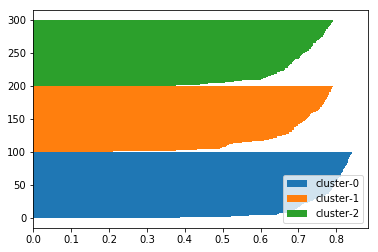

In [8]:
y_ax_lower, y_ax_upper = 0,0
yticks = []

for i,c in enumerate(cluster_labels):
    c_s_vals = s_vals[y_km==c]
    c_s_vals.sort()
    y_ax_upper += len(c_s_vals)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_s_vals,
            height = 1, label="cluster-"+str(c))
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_s_vals)
plt.legend()

### - Redo the above procedure but use K=2 clusters

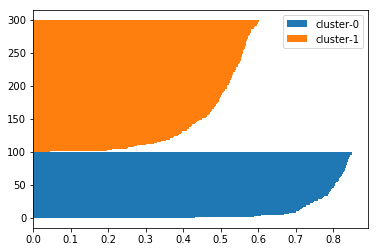

In [9]:
km = KMeans(2)  # 2 clusters
km.fit(X)
y_km = km.predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
s_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []

for i,c in enumerate(cluster_labels):
    c_s_vals = s_vals[y_km==c]
    c_s_vals.sort()
    y_ax_upper += len(c_s_vals)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_s_vals,
            height = 1, label="cluster-"+str(c))
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_s_vals)
plt.legend()

## Application of KMeans to Digits

For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

We see ten clusters in 64 dimensions. Let's visualize each of these cluster centers to see what they represent:

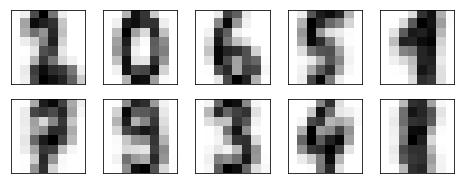

In [12]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

We see that *even without the labels*, KMeans is able to find clusters whose means are recognizable digits.

The cluster labels are permuted; let's fix this:

In [13]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

For good measure, let's use our PCA visualization and look at the true cluster labels and K-means cluster labels:

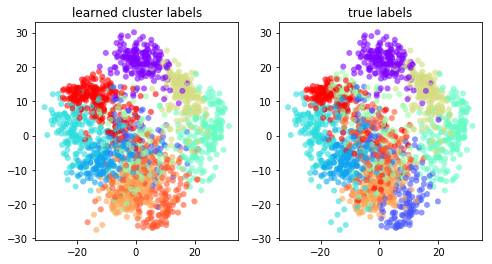

In [14]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

Just for kicks, let's see how accurate our K-Means classifier is **with no label information:**

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79465776293823043

80% – not bad! Let's check-out the confusion matrix for this:

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   1 155   0   2   0   7   7  11]
 [  0   5   0   0 164   0   0   8   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   4   0   4   2   4 103  48]
 [  0  20   0   6   0   6   0   7   2 139]]


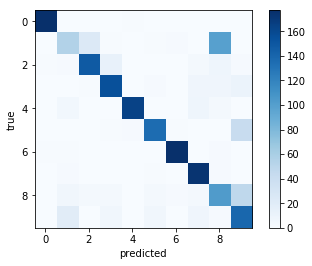

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Again, this is an 80% classification accuracy for an **entirely unsupervised estimator** which knew nothing about the labels.